In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [157]:
rawData = '''人口基本情况,1982年,1990年,2000年,2020年,2021年
0-14岁人口,34156,31670,29024,25277,24721
15-64岁人口,62517,76260,88847,96871,96481
65岁以上人口,4981,6403,8872,19064,20059'''
rawData

'人口基本情况,1982年,1990年,2000年,2020年,2021年\n0-14岁人口,34156,31670,29024,25277,24721\n15-64岁人口,62517,76260,88847,96871,96481\n65岁以上人口,4981,6403,8872,19064,20059'

In [170]:
delimiter = ','  # OP1 分隔符
showTitle = True  # OP2 是否显示图标题
showRaw = True
rowNum = 2  # OP3 行数
columnNum = 3  # OP4 列数
fontFamily = 'KaiTi'  # OP5 字体
textColor = '#CCCCCC'  # OP6 文本颜色
textSize = 'medium'  # OP7 显示字体大小 (xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller)
precision = 2  # OP8 百分比精度
width = 9  # OP9 图像长度 (inch)
height = 6  # OP10 图像宽度 (inch)
dpi = 96  # OP11 DPI
legendPosition = 'right'  # OP12 图例位置，left | right
highlightPortion = '65岁以上人口'  # OP13 强调部分
colorSchema = 'Set1'  # OP14 颜色模式
colors = [
    '#C1272d',
    '#0000A7',
    '#EECC16',
]  # OP15 自定义颜色

In [159]:
df = pd.read_csv(StringIO(rawData), delimiter=delimiter, index_col=0)
df

,1982年,1990年,2000年,2020年,2021年
人口基本情况,,,,,
0-14岁人口,34156,31670,29024,25277,24721
15-64岁人口,62517,76260,88847,96871,96481
65岁以上人口,4981,6403,8872,19064,20059


In [160]:
title = df.index.name  # 图标题
title

'人口基本情况'

In [161]:
# df = df.div(df.sum(axis=1), axis=0) * 100
# df

In [162]:
plt.rcParams['font.family']

['KaiTi', 'sans-serif']

In [163]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.family']

['sans-serif']

In [164]:
plt.rcParams['font.family'] = [fontFamily] + plt.rcParams['font.family']

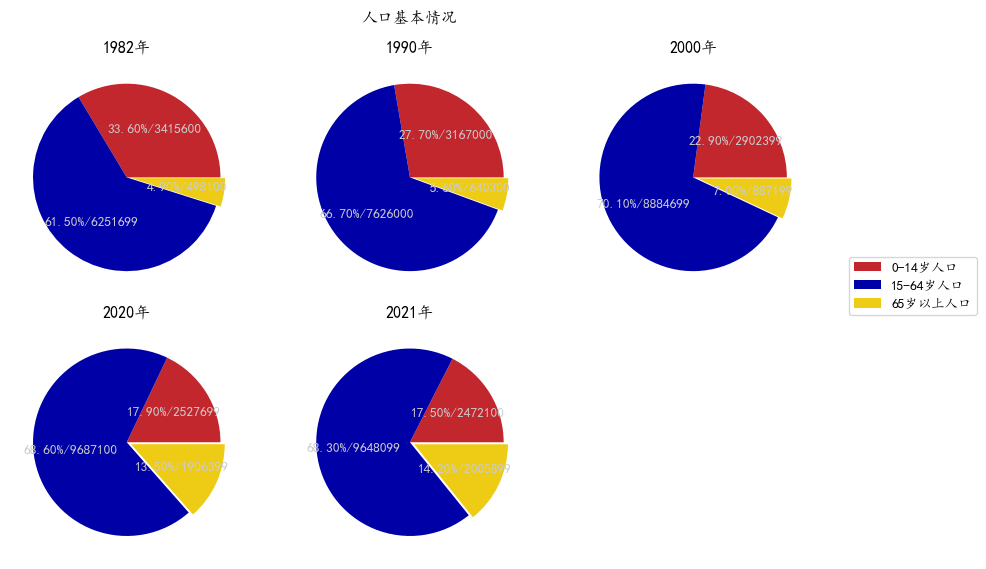

In [165]:
def autopct(pct, values):
    if showRaw:
        total = sum(values)
        return ('{pct:.' + str(precision) + 'f}%/{value:d}').format(pct=pct, value=int(total*pct))
    return ('{:.' + str(precision) + 'f}%').format(pct)

fig = plt.figure(figsize=(width, height), dpi=dpi)

# 方式二
if showTitle:
    plt.suptitle(title, fontname=fontFamily)

## 计算强调部分
explode = [0.05 if indexLabel == highlightPortion else 0 for indexLabel in df.index]

## 计算显示的色值
if not colors or len(colors) != len(df.index):
    cmap = plt.cm.get_cmap(colorSchema)
    colors = cmap(range(0, len(df.index)))

for i, column in enumerate(df.columns):
    rowIndex = i // columnNum
    columnIndex = i % columnNum
    ax = plt.subplot2grid((rowNum, columnNum), (rowIndex, columnIndex))
    patches, texts, autotexts = ax.pie(df[column], autopct=lambda pct: autopct(pct, df[column]), textprops=dict(
        color=textColor,
        size=textSize,
    ), explode=explode, colors=colors)
    # print(df[column])
    ax.set_title(column)

if legendPosition == 'left':
    legendParams = {
        'loc': 'center right',
        'bbox_to_anchor': (0, 0.5),
    }
else:
    legendParams = {
        'loc': 'center left',
        'bbox_to_anchor': (1, 0.5),
    }

fig.legend(patches, df.index, **legendParams)
plt.tight_layout()

In [166]:
[0.05 if indexLabel == highlightPortion else 0 for indexLabel in df.index]


[0, 0, 0.05]

In [167]:
plt.cm.get_cmap('Paired')([0, 1, 2])

array([[0.65098039, 0.80784314, 0.89019608, 1.        ],
       [0.12156863, 0.47058824, 0.70588235, 1.        ],
       [0.69803922, 0.8745098 , 0.54117647, 1.        ]])

In [168]:
df.columns

Index(['1982年', '1990年', '2000年', '2020年', '2021年'], dtype='object')

In [169]:
df['1982年']

人口基本情况
0-14岁人口     34156
15-64岁人口    62517
65岁以上人口      4981
Name: 1982年, dtype: int64